In [ ]:
from pymongo import MongoClient


In [ ]:
from prophet import Prophet

In [16]:
m=Prophet()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
#import binance
from datetime import datetime, timedelta
from dateutil import parser
#pd.options.display.float_format="{:,.1f}".format

# conectar con la DB

In [18]:
client = MongoClient('localhost', 27017)
db=client["back_prueba"]
#db.drop_collection()
data= db.signals.find()
list_data = list(data)


In [19]:
df = pd.DataFrame(list_data)
df.columns


Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency'],
      dtype='object')

In [20]:
mask=df["symbol"]=="KAVAUSDT"
df.loc[:,["is_long",'dates_entry',
        'dates_profit', 
        'dates_stoploss',
        'symbol',
        "efficiency",
        "channel"]]

,is_long,dates_entry,dates_profit,dates_stoploss,symbol,efficiency,channel
0,True,"{'269.5': 2020-08-28 11:10:00, '267.0': 2020-0...","{'273.0': 2020-08-30 08:35:00, '275.0': 2020-0...",{'257.05': 2020-09-02 07:10:00},BCHUSDT,{'3/3 ': 1.0},Crypto Futures Spot Signals😘
1,True,"{'367.2': 2020-09-14 07:15:00, '363.0': 2020-0...","{'370.0': 2020-09-14 08:00:00, '373.4': 2020-0...",{'352.11': 2020-09-21 07:20:00},ETHUSDT,{'5/5 ': 1.0},Crypto Futures Spot Signals😘
2,False,"{'11030.0': 2020-10-09 07:00:00, '11065.0': 20...","{'10950.0': False, '10900.0': False, '10850.0'...",{'11190.0': 2020-10-09 22:05:00},BTCUSDT,{'0/5 ': 0.0},Crypto Futures Spot Signals😘
3,True,"{'1.1285999999999998': 2021-02-17 03:55:00, '1...","{'2.0': False, '3.0': False}",{'1.0947419999999999': 2021-02-22 10:10:00},ONTUSDT,{'0/2 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,True,"{'1.9205999999999999': 2021-02-20 18:15:00, '1...",{'2.03': False},{'1.862982': 2021-02-20 18:30:00},TOMOUSDT,{'0/1 ': 0.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,True,"{'4.2867': 2021-02-18 09:55:00, '4.297525': 20...",{'4.45': 2021-02-18 12:30:00},{'4.158099': 2021-02-18 22:05:00},NEARUSDT,{'1/1 ': 1.0},𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,True,"{'167.0': 2021-08-30 19:45:00, '175.0': 2021-0...","{'176.8': 2021-09-01 10:20:00, '179.0': 2021-0...",{'156.79': 2021-09-20 07:25:00},LTCUSDT,{'9/10 ': 0.9},Bitcoin Bullets VIP Free
7,True,"{'0.264': 2021-09-07 10:45:00, '0.288': 2021-0...","{'0.292': False, '0.3': False, '0.31': False, ...",{'0.244': 2021-09-07 10:55:00},DOGEUSDT,{'0/10 ': 0.0},Bitcoin Bullets VIP Free
8,True,"{'1.033': 2021-09-07 10:55:00, '1.108': 2021-0...","{'1.122': False, '1.14': False, '1.16': False,...",{'0.942': 2021-09-07 11:05:00},ONTUSDT,{'0/14 ': 0.0},Bitcoin Bullets VIP Free
9,False,"{'40.0': 2021-07-26 00:40:00, '41.66': 2021-07...","{'39.0': 2021-07-26 02:25:00, '37.5': 2021-07-...",{'47.76': 2021-07-27 05:25:00},AXSUSDT,{'3/8 ': 0.375},Federal Russian Insiders VIP Free


In [21]:
datetime.utcfromtimestamp(1600081846)

datetime.datetime(2020, 9, 14, 11, 10, 46)

# Read pickle

In [22]:
#df_sygnal_data = pd.read_csv("sygnals_operations.csv")
df_sygnal_data:pd.DataFrame = pd.read_pickle("sygnals_operations.pickle")

# Crear archivo pickle

In [23]:
df.to_pickle('sygnals_operations.pickle',)


# drop a row from df

In [24]:
mask="stop_targets"
df[mask]

0                 [257.05]
1                 [352.11]
2                [11190.0]
3     [1.0947419999999999]
4               [1.862982]
5               [4.158099]
6                 [156.79]
7                  [0.244]
8                  [0.942]
9                  [47.76]
10                  [0.56]
11                [123.05]
Name: stop_targets, dtype: object

In [25]:
df["stop_targets"].apply(lambda x: x.pop(0))
#lis=[].pop(0)
#lis

0       257.050000
1       352.110000
2     11190.000000
3         1.094742
4         1.862982
5         4.158099
6       156.790000
7         0.244000
8         0.942000
9        47.760000
10        0.560000
11      123.050000
Name: stop_targets, dtype: float64

In [26]:
df[["symbol","currencies", "channel"]]


,symbol,currencies,channel
0,BCHUSDT,"{'primary': 'BCH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
1,ETHUSDT,"{'primary': 'ETH', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
2,BTCUSDT,"{'primary': 'BTC', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
3,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
4,TOMOUSDT,"{'primary': 'TOMO', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
5,NEARUSDT,"{'primary': 'NEAR', 'segundary': 'USDT'}",𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔
6,LTCUSDT,"{'primary': 'LTC', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
7,DOGEUSDT,"{'primary': 'DOGE', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
8,ONTUSDT,"{'primary': 'ONT', 'segundary': 'USDT'}",Bitcoin Bullets VIP Free
9,AXSUSDT,"{'primary': 'AXS', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free


In [27]:
df.columns

Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id', 'message_link', 'dates_entry',
       'dates_stoploss', 'dates_profit', 'efficiency'],
      dtype='object')

In [28]:
mask=df["symbol_message"].str.contains("/")
mask
df=df[mask]

In [29]:
df.channel.value_counts()


Crypto Futures Spot Signals😘    3
Name: channel, dtype: int64

In [30]:
symbols_count = df[["symbol", "channel"]].value_counts().sort_values(ascending=False)
important_symbol = symbols_count.head(40)
type(important_symbol)


pandas.core.series.Series

In [31]:
symbols_count = df[["symbol", "channel"]]
important_symbol = symbols_count
important_symbol.groupby("channel").describe()


symbol                     
                              count unique      top freq
channel                                                 
Crypto Futures Spot Signals😘      3      3  BCHUSDT    1

<AxesSubplot:>

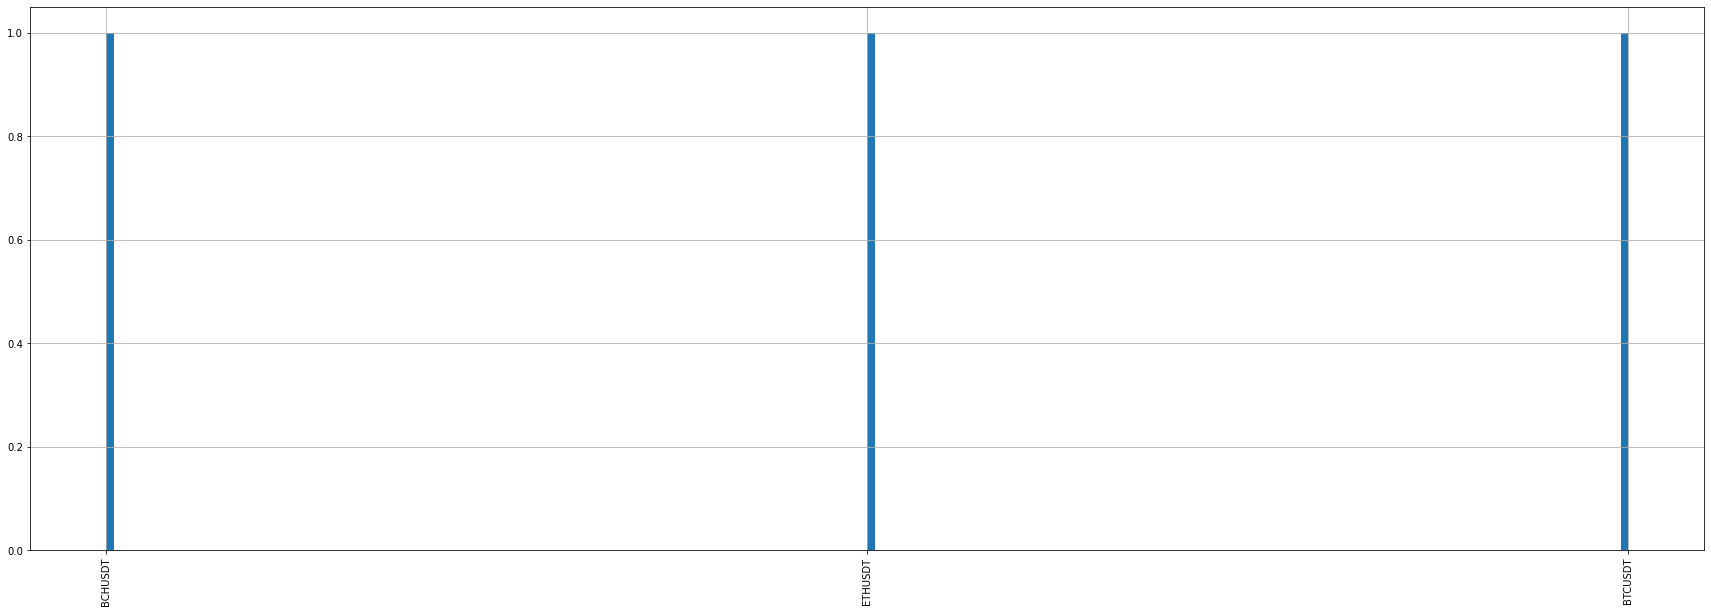

In [32]:
important_symbol["symbol"].hist(figsize=(30, 10),xrot=90, bins=200,)


In [33]:
#plt.figure(figsize=(50, 10))
#plt.xticks(rotation=90)
#sns.histplot(data=important_symbol, x="symbol",hue="channel",palette="Set1")


In [34]:
df[["timeStamp_Tg","message_id","channel_id","date"]]


,timeStamp_Tg,message_id,channel_id,date
0,1598624376,203,-1001381384148,2020-08-28 10:19:36
1,1600081846,281,-1001381384148,2020-09-14 07:10:46
2,1600576224,321,-1001381384148,2020-09-20 00:30:24


In [35]:
from datetime import timedelta, datetime, time

In [36]:
#str(datetime(2020,3,1,1,30,0)-h4)
new=datetime.utcfromtimestamp(1647354765)
old=datetime.fromtimestamp(1647354765)

base=(new-old).total_seconds()/60

base

240.0

In [37]:
import math

In [38]:
h1=60
math.ceil(base/h1)

4

In [39]:
h4 = timedelta(hours=4)
h4

datetime.timedelta(seconds=14400)

In [40]:
df2["datetime"]= pd.to_datetime(df2["timeStamp_Tg"], unit="s")
df2["datetime"]

NameError: name 'df2' is not defined

In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 14:32:45
1,1646753327,5244,-1001381384148,2022-03-08 15:28:47
2,1646653781,5228,-1001381384148,2022-03-07 11:49:41
3,1645112197,5092,-1001381384148,2022-02-17 15:36:37
4,1645031424,5081,-1001381384148,2022-02-16 17:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-30 00:03:02
1121,1627583234,95,-1001277174399,2021-07-29 18:27:14
1122,1627543095,88,-1001277174399,2021-07-29 07:18:15
1123,1627410165,66,-1001277174399,2021-07-27 18:22:45


In [ ]:
df2["datetime"]=df2["datetime"].apply(lambda x : x - h4)


In [ ]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 10:32:45
1,1646753327,5244,-1001381384148,2022-03-08 11:28:47
2,1646653781,5228,-1001381384148,2022-03-07 07:49:41
3,1645112197,5092,-1001381384148,2022-02-17 11:36:37
4,1645031424,5081,-1001381384148,2022-02-16 13:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-29 20:03:02
1121,1627583234,95,-1001277174399,2021-07-29 14:27:14
1122,1627543095,88,-1001277174399,2021-07-29 03:18:15
1123,1627410165,66,-1001277174399,2021-07-27 14:22:45


In [ ]:
if len(data) > 0:  
        old = parser.parse(
            data["timestamp"].iloc[-1]
            )

In [ ]:
if len(data)>0:
    old= parser.parse(
        data["timestamp"].iloc[-1]
    )

In [ ]:
pd.options.display.float_format="{:,.1f}".format
pd.options.display.precision = 1

# Leyendo symbol data

In [ ]:
df_symbol:pd.DataFrame=pd.read_pickle("../../BTCUSDT-5m-data.pickle")
#df_symbol.to_csv("BTCUSDT-5m-data.csv")

# Revisando el orden de los tiempos

Efectivamente como el index es timestamp.

In [ ]:
### slice
date_start="2020-09-20 00:30:24"
date_end=pd.to_datetime("2020-05-05 15:45:01")
mask: pd.Series = df_symbol["date_myUTC"]
mask = mask.between(date_start, date_end)
temp_df_symbol=df_symbol[mask]

# Compara los años de cada elemento con el año de la fecha dada
#mask=df_symbol["date_myUTC"].apply(lambda x : x.year) == date_end.year
#df_symbol[mask].empty


True

In [ ]:
df_symbol.loc[:, ["open", "high", "low", "close"]] = df_symbol.loc[:, ["open", "high", "low", "close"]].astype(float)
operate=11030
mask=mask = (df_symbol["date_myUTC"] == pd.to_datetime("2022")) #(df_symbol["high"] >= operate) #| (df_symbol["low"] <= operate)
df_symbol.iloc[0]#.loc[:,["open", "high", "low", "close","date_myUTC"]]

open                      46216.93
high                      46391.49
low                       46208.37
close                     46321.34
volume                185.67558000
close_time           1640995499999
quote_av          8598314.37243310
trades                        4551
tb_base_av            106.54655000
tb_quote_av       4933083.00041560
ignore                           0
date_myUTC     2021-12-31 20:00:00
Name: 1640995200000, dtype: object

In [ ]:
plt.

# Capturar la eficiencia con los take profit

In [ ]:
dates_profit={
    "0.292": {
      "$date": "2021-09-01T14:50:00Z"
    },
    "0.3": {
      "$date": "2021-09-01T20:30:00Z"
    },
    "0.31": {
      "$date": "2021-09-01T21:30:00Z"
    },
    "0.325": False,
    "0.34": False,
    "0.36": False,
    "0.38": False,
    "0.4": False,
    "0.42": False,
    "0.45": False
  }

In [ ]:
(len(list(dates_profit.values()))-list(dates_profit.values()).count(False))/len(list(dates_profit.values()))

0.3

In [ ]:
3/10

0.3

In [ ]:
df_sygnal_data.iloc[1]#["entry_targets"][1]

NameError: name 'df_sygnal_data' is not defined

In [ ]:
# %%timeit 3.46 ms
mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.between("2022-03-08","2022-04-08")
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 394 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end=str(BTCUSDT_date["date_myUTC"].iloc[-1]),freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(12305, 12)

In [ ]:
# %%timeit 115 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end="2022-04-08 00:00.00",freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [ ]:
# %%timeit 4.24 ms
mask=(BTCUSDT_date["date_myUTC"] > 
pd.to_datetime("2022-03-08 00:00.00")) & (BTCUSDT_date["date_myUTC"] <= 
pd.to_datetime("2022-04-08 00:00.00"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape

(8928, 12)

In [ ]:
def t(la_t):
    if la_t:
        return "la_t"
    print("aqui toy")
    return "No la_t"

t(True)

'la_t'

In [ ]:
def regresar(row,iterated,returned):
    l=[]
    for row in iterated:
        l.append(returned)
    return l


# Funciones para los df

In [2]:
def float_ohlcv(df_symbol):
    df_symbol2=df_symbol.copy()
    df_symbol2[["open","high","low","close"]]=df_symbol2[["open","high","low","close"]].astype(float)
    return df_symbol2

# Probando recorrer filas

In [ ]:
%%timeit
l=[]
l.append(df_sygnal_data.apply(lambda row: row["date"],axis=1))
l

13.2 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for row in df_sygnal_data.itertuples():
#    print(row.date)
regresar(row,df_sygnal_data.itertuples(),row.date)


5.14 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
#for index, row in df_sygnal_data.iterrows():
#    print(row.date)
regresar((index,row),df_sygnal_data.iterrows(),row.date)    

35.4 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
#for i in range(len(df_sygnal_data)):
#    print(df_sygnal_data.loc[i,"date"])
regresar(i,range(len(df_sygnal_data)),df_sygnal_data.loc[i,"date"])

92.9 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
df_sygnal_data.columns

NameError: name 'df_sygnal_data' is not defined

In [77]:
df_symbol.iloc[0,0]
float(df_symbol.iloc[0,0])

46216.93

In [159]:
operate=43000
mask=(df_symbol2["open"])>=operate | (df_symbol2["high"]>=operate) | (df_symbol2["low"]>=operate) | (df_symbol2["close"]>=operate) & df_symbol2["date_myUTC"].between("2020-03-08","2022-04-08")

lalist:pd.DataFrame= df_symbol[mask].iloc[0:3][["date_myUTC","open"]]

ladict={k[1]:k[0] for k in lalist.to_dict("split")["data"]}
list(ladict.values())[0]

Timestamp('2021-12-31 20:00:00')

In [117]:
lalist.sort(reverse=True)
lalist

[Timestamp('2021-12-31 20:10:00'),
 Timestamp('2021-12-31 20:05:00'),
 Timestamp('2021-12-31 20:00:00')]

# Otras pruebas

In [7]:
l1=[0,1,2,3]
l2=["a","b","c","d"]
d1={}

for i in l1:
    d1[i]=l2[i]

d1

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# Leer documentos bases de datos .db con pandas

In [7]:
import sqlite3
dat=sqlite3.connect("C:/Users/Joan/Downloads/Programa/tradingview.db")

In [13]:
dat
sqlite3.table

30

In [17]:
df=pd.read_sql_query("SELECT * FROM tv", dat)

In [25]:
df[df["exchange"]=='BINANCE']

,screener,exchange,symbol,desc
13484,crypto,BINANCE,ALICEBTC,ALICE / Bitcoin
13488,crypto,BINANCE,MANABTC,Decentraland / Bitcoin
13493,crypto,BINANCE,BURGERUSDT,BURGER / TetherUS
13495,crypto,BINANCE,EPSUSDT,EPS / TetherUS
13499,crypto,BINANCE,RSRBTC,RSR / Bitcoin
...,...,...,...,...
69751,crypto,BINANCE,GALUSDT_PREMIUM,GALUSDT Premium Index
69757,crypto,BINANCE,GALUSD,GAL / US Dollar (calculated by TradingView)
69768,crypto,BINANCE,ASTRBTC,ASTR / Bitcoin
69782,crypto,BINANCE,STEEMUSDT,Steem / TetherUS


In [22]:
df["exchange"].unique()

array(['NASDAQ', 'NYSE', 'OTC', 'AMEX', 'FX_IDC', 'BINANCE', 'BITFINEX',
       'HITBTC', 'KUCOIN', 'BITTREX', 'KRAKEN', 'COINBASE', 'EXMO',
       'HUOBI', 'BITHUMB', 'BITSTAMP', 'POLONIEX', 'CURRENCYCOMLEV',
       'OKCOIN', 'COINFLOOR', 'KORBIT', 'BYBIT', 'BITKUB', 'CAPITALCOM',
       'GEMINI', 'BITFLYER', 'MERCADO', 'CEXIO', 'BITPANDAPRO',
       'TRADESTATION', 'THEROCKTRADING', 'BITSO', 'BTCYOU', 'IDX', 'NSE',
       'BSE', 'TVC', 'DJ', 'CBOE', 'EURONEXT', 'SIX', 'OANDA', 'OMXCOP',
       'FTSEMYX', 'TWSE', 'BVC', 'OMXVSE', 'OMXSTO', 'FX', 'TSX', 'BME',
       'BIST', 'OMXRSE', 'OMXTSE', 'SZSE', 'HSI', 'SP', 'DFM', 'EGX',
       'BAHRAIN', 'BMV', 'BMFBOVESPA', 'OMXICE', 'ASX', 'TADAWUL', 'XETR',
       'TASE', 'QSE', 'GPW', 'OMXHEX', 'BVL', 'MOEX', 'BCBA', 'BCS',
       'NZX', 'BELEX', 'NYMEX_MINI', 'CME_MINI', 'CBOT', 'NYMEX', 'CME',
       'COMEX', 'ICEUS', 'CBOT_MINI', 'COMEX_MINI', 'EUREX', 'LSE',
       'LSIN', 'CRYPTOCAP', 'FTX', 'HNX', 'HOSE', 'UPCOM', 'JSE', 'SET',
     

In [16]:
df=pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name ",dat)


,name
0,tv


# Prueba tradingview

In [3]:
import tradingview_ta

In [37]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY
)
#tesla.add_indicators(["RSI7","VWMA"])
print(tesla.get_analysis().summary)
list(tesla.get_indicators().keys())[40:]

{'RECOMMENDATION': 'SELL', 'BUY': 6, 'SELL': 10, 'NEUTRAL': 10}


['SMA50',
 'EMA100',
 'SMA100',
 'EMA200',
 'SMA200',
 'Rec.Ichimoku',
 'Ichimoku.BLine',
 'Rec.VWMA',
 'VWMA',
 'Rec.HullMA9',
 'HullMA9',
 'Pivot.M.Classic.S3',
 'Pivot.M.Classic.S2',
 'Pivot.M.Classic.S1',
 'Pivot.M.Classic.Middle',
 'Pivot.M.Classic.R1',
 'Pivot.M.Classic.R2',
 'Pivot.M.Classic.R3',
 'Pivot.M.Fibonacci.S3',
 'Pivot.M.Fibonacci.S2',
 'Pivot.M.Fibonacci.S1',
 'Pivot.M.Fibonacci.Middle',
 'Pivot.M.Fibonacci.R1',
 'Pivot.M.Fibonacci.R2',
 'Pivot.M.Fibonacci.R3',
 'Pivot.M.Camarilla.S3',
 'Pivot.M.Camarilla.S2',
 'Pivot.M.Camarilla.S1',
 'Pivot.M.Camarilla.Middle',
 'Pivot.M.Camarilla.R1',
 'Pivot.M.Camarilla.R2',
 'Pivot.M.Camarilla.R3',
 'Pivot.M.Woodie.S3',
 'Pivot.M.Woodie.S2',
 'Pivot.M.Woodie.S1',
 'Pivot.M.Woodie.Middle',
 'Pivot.M.Woodie.R1',
 'Pivot.M.Woodie.R2',
 'Pivot.M.Woodie.R3',
 'Pivot.M.Demark.S1',
 'Pivot.M.Demark.Middle',
 'Pivot.M.Demark.R1',
 'open',
 'P.SAR',
 'BB.lower',
 'BB.upper',
 'AO[2]',
 'volume',
 'change',
 'low',
 'high']

## funciones

In [5]:
def get_tv_ta_recomendation(symbol:str)-> dict:
    handler=TA_Handler(
        symbol=symbol,
        screener="crypto",
        exchange="BINANCE",
        interval=Interval.INTERVAL_5_MINUTES
    )
    return handler.get_indicators()

In [6]:
#data_path="C:/Users/Joan/Documents/Programacion/Python/Pasantias/analisis_read_binance/Proyecto/notebooks/sygnals_operations.csv"
df_sygnal_data= pd.read_csv("sygnals_operations.csv")

In [ ]:
df_sygnal_data=df_sygnal_data.iloc[:5]
df_recomendation= []
for i in range(len(df_sygnal_data)):
    print(f"""i:{i} --- symbol:{df_sygnal_data.loc[i,"symbol"]}""")
    dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[i,"symbol"])
    df_recomendation.append(dict_recomendation)

In [63]:
dict_recomendation=get_tv_ta_recomendation(df_sygnal_data.loc[0,"symbol"])

In [64]:
dict_recomendation

{'RECOMMENDATION': 'SELL', 'BUY': 2, 'SELL': 13, 'NEUTRAL': 11}

# Probando pandas_ta

In [7]:
import pandas_ta as ta

In [8]:
df_symbol=pd.read_pickle("../../ATOMBTC-5m-data.pickle")

In [13]:
df_symbol=float_ohlcv(df_symbol=df_symbol)

Para copiar las recomendaciones de trading view revisar:

- Trading view compute: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/technicals.py

- Trading view clasification: https://github.com/brian-the-dev/python-tradingview-ta/blob/main/tradingview_ta/main.py

In [ ]:
# OSCCILATORS
#rsi
df_symbol.ta.rsi() # need a RSI1
df_symbol.ta.rsi(length=5) # is RSI1

#stoch
df_symbol.ta.stoch() # need a stk1 and a std1
df_symbol.ta.stoch().iloc[-2] # the before value are stk1 and std1

#CCI 20 and CCI 201 (this is the before value of CCI 20)
cci=pd.concat(
    [df_symbol.ta.cci(length=20).iloc[-1],df_symbol.ta.cci(length=20).iloc[-2]],axis=1)
cci
#ADX (14)
# need an adxpdi1, adxndi1
df_symbol.ta.adx(length=14,).iloc[-1:,:], df_symbol.ta.adx(length=14,).iloc[-2,1:] #the before value is adxpdi1, adxndi1
#AO
df_symbol.ta.ao().iloc[-1],df_symbol.ta.ao().iloc[-2],df_symbol.ta.ao().iloc[-3] # THE BEFORE DATA IS ao1, ao2

Ya que 5 min es una temporalidad muy baja lo mejor seria es aplicar la recomendacion a una temporalidad de 1 día. con el fin de predecir la tendencia sobre esta temporalidad.

In [26]:
tv=get_tv_ta_recomendation("ATOMBTC")
tv['AO'],tv['AO[1]'],tv['AO[2]']


#tv.keys()

(-6.2e-07, -2.6e-07, 2e-07)

In [27]:
df_symbol=pd.read_pickle("../../ATOMBTC-5m-data.pickle")
df_symbol=float_ohlcv(df_symbol=df_symbol)
df_symbol.ta.ao().iloc[-5:], df_symbol.ta.ao().iloc[-6:] # need a RSI1


(timestamp
 1653901200000    1.000588e-06
 1653901500000    5.758824e-07
 1653901800000    1.805882e-07
 1653902100000   -2.814706e-07
 1653902400000   -6.632353e-07
 Name: AO_5_34, dtype: float64,
 timestamp
 1653900900000    1.335882e-06
 1653901200000    1.000588e-06
 1653901500000    5.758824e-07
 1653901800000    1.805882e-07
 1653902100000   -2.814706e-07
 1653902400000   -6.632353e-07
 Name: AO_5_34, dtype: float64)

# Funciones recomendacionde TV_TA pero usando pandas_ta

In [ ]:
# Tradingview Technical Analysis (tradingview-ta)
# Author: deathlyface (https://github.com/deathlyface)
# License: MIT

import requests, json, datetime, warnings
from .technicals import Compute

__version__ = "3.2.10"

class Analysis(object):
    exchange = ""
    symbol = ""
    screener = ""
    time = ""
    interval = ""
    summary = {}
    oscillators = {}
    moving_averages = {}
    indicators = {}

class Interval:
    INTERVAL_1_MINUTE = "1m"
    INTERVAL_5_MINUTES = "5m"
    INTERVAL_15_MINUTES = "15m"
    INTERVAL_30_MINUTES = "30m"
    INTERVAL_1_HOUR = "1h"
    INTERVAL_2_HOURS = "2h"
    INTERVAL_4_HOURS = "4h"
    INTERVAL_1_DAY = "1d"
    INTERVAL_1_WEEK = "1W"
    INTERVAL_1_MONTH = "1M"

class Exchange:
    FOREX = "FX_IDC"
    CFD = "TVC"


class TradingView:
    # Note: Please DO NOT modify the order or DELETE existing indicators, it will break the technical analysis. You may APPEND custom indicator to the END of the list.
    indicators = ["Recommend.Other","Recommend.All","Recommend.MA","RSI","RSI[1]","Stoch.K","Stoch.D","Stoch.K[1]","Stoch.D[1]","CCI20","CCI20[1]","ADX","ADX+DI","ADX-DI","ADX+DI[1]","ADX-DI[1]","AO","AO[1]","Mom","Mom[1]","MACD.macd","MACD.signal","Rec.Stoch.RSI","Stoch.RSI.K","Rec.WR","W.R","Rec.BBPower","BBPower","Rec.UO","UO","close","EMA5","SMA5","EMA10","SMA10","EMA20","SMA20","EMA30","SMA30","EMA50","SMA50","EMA100","SMA100","EMA200","SMA200","Rec.Ichimoku","Ichimoku.BLine","Rec.VWMA","VWMA","Rec.HullMA9","HullMA9","Pivot.M.Classic.S3","Pivot.M.Classic.S2","Pivot.M.Classic.S1","Pivot.M.Classic.Middle","Pivot.M.Classic.R1","Pivot.M.Classic.R2","Pivot.M.Classic.R3","Pivot.M.Fibonacci.S3","Pivot.M.Fibonacci.S2","Pivot.M.Fibonacci.S1","Pivot.M.Fibonacci.Middle","Pivot.M.Fibonacci.R1","Pivot.M.Fibonacci.R2","Pivot.M.Fibonacci.R3","Pivot.M.Camarilla.S3","Pivot.M.Camarilla.S2","Pivot.M.Camarilla.S1","Pivot.M.Camarilla.Middle","Pivot.M.Camarilla.R1","Pivot.M.Camarilla.R2","Pivot.M.Camarilla.R3","Pivot.M.Woodie.S3","Pivot.M.Woodie.S2","Pivot.M.Woodie.S1","Pivot.M.Woodie.Middle","Pivot.M.Woodie.R1","Pivot.M.Woodie.R2","Pivot.M.Woodie.R3","Pivot.M.Demark.S1","Pivot.M.Demark.Middle","Pivot.M.Demark.R1", "open", "P.SAR", "BB.lower", "BB.upper", "AO[2]", "volume", "change", "low", "high", "Stoch.RSI.D"]

    scan_url = "https://scanner.tradingview.com/"

    def data(symbols, interval, indicators):
        """Format TradingView's Scanner Post Data
        Args:
            symbols (list): List of EXCHANGE:SYMBOL (ex: ["NASDAQ:AAPL"] or ["BINANCE:BTCUSDT"])
            interval (string): Time Interval (ex: 1m, 5m, 15m, 1h, 4h, 1d, 1W, 1M)
        Returns:
            string: JSON object as a string.
        """
        if interval == "1m":
            # 1 Minute
            data_interval = "|1"
        elif interval == "5m":
            # 5 Minutes
            data_interval = "|5"
        elif interval == "15m":
            # 15 Minutes
            data_interval = "|15"
        elif interval == "30m":
            # 30 Minutes
            data_interval = "|30"
        elif interval == "1h":
            # 1 Hour
            data_interval = "|60"
        elif interval == "2h":
            # 2 Hours
            data_interval = "|120"
        elif interval == "4h":
            # 4 Hour
            data_interval = "|240"
        elif interval == "1W":
            # 1 Week
            data_interval = "|1W"
        elif interval == "1M":
            # 1 Month
            data_interval = "|1M"
        else:
            if interval != '1d':
                warnings.warn("Interval is empty or not valid, defaulting to 1 day.")
            # Default, 1 Day
            data_interval = ""

        data_json = {"symbols":{"tickers":[symbol.upper() for symbol in symbols],"query":{"types":[]}},"columns":[x + data_interval for x in indicators]}

        return data_json

def calculate(indicators, indicators_key, screener, symbol, exchange, interval):
    oscillators_counter, ma_counter = {"BUY": 0, "SELL": 0, "NEUTRAL": 0}, {"BUY": 0, "SELL": 0, "NEUTRAL": 0}
    computed_oscillators, computed_ma = {}, {}

    indicators = list(indicators.values())

    # RECOMMENDATIONS
    if None not in indicators[0:2]:
        recommend_oscillators = Compute.Recommend(indicators[0])
        recommend_summary = Compute.Recommend(indicators[1])
        recommend_moving_averages = Compute.Recommend(indicators[2])
    else:
        return None

    # OSCILLATORS
    # RSI (14)
    if None not in indicators[3:5]:
        computed_oscillators["RSI"] = Compute.RSI(indicators[3], indicators[4])
        oscillators_counter[computed_oscillators["RSI"]] += 1
    # Stoch %K
    if None not in indicators[5:9]:
        computed_oscillators["STOCH.K"] = Compute.Stoch(indicators[5], indicators[6], indicators[7], indicators[8])
        oscillators_counter[computed_oscillators["STOCH.K"]] += 1
    # CCI (20)
    if None not in indicators[9:11]:
        computed_oscillators["CCI"] = Compute.CCI20(indicators[9], indicators[10])
        oscillators_counter[computed_oscillators["CCI"]] += 1
    # ADX (14)
    if None not in indicators[11:16]:
        computed_oscillators["ADX"] = Compute.ADX(indicators[11], indicators[12], indicators[13], indicators[14], indicators[15])
        oscillators_counter[computed_oscillators["ADX"]] += 1
    # AO
    if None not in indicators[16:18] and indicators[86] != None:
        computed_oscillators["AO"] = Compute.AO(indicators[16], indicators[17], indicators[86])
        oscillators_counter[computed_oscillators["AO"]] += 1
    # Mom (10)
    if None not in indicators[18:20]:
        computed_oscillators["Mom"] = Compute.Mom(indicators[18], indicators[19])
        oscillators_counter[computed_oscillators["Mom"]] += 1
    # MACD
    if None not in indicators[20:22]:
        computed_oscillators["MACD"] = Compute.MACD(indicators[20], indicators[21])
        oscillators_counter[computed_oscillators["MACD"]] += 1
    # Stoch RSI
    if indicators[22] != None:
        computed_oscillators["Stoch.RSI"] = Compute.Simple(indicators[22])
        oscillators_counter[computed_oscillators["Stoch.RSI"]] += 1
    # W%R
    if indicators[24] != None:
        computed_oscillators["W%R"] = Compute.Simple(indicators[24])
        oscillators_counter[computed_oscillators["W%R"]] += 1
    # BBP
    if indicators[26] != None:
        computed_oscillators["BBP"] = Compute.Simple(indicators[26])
        oscillators_counter[computed_oscillators["BBP"]] += 1
    # UO
    if indicators[28] != None:
        computed_oscillators["UO"] = Compute.Simple(indicators[28])
        oscillators_counter[computed_oscillators["UO"]] += 1

    # MOVING AVERAGES
    ma_list = ["EMA10","SMA10","EMA20","SMA20","EMA30","SMA30","EMA50","SMA50","EMA100","SMA100","EMA200","SMA200"]
    close = indicators[30]
    ma_list_counter = 0
    for index in range(33, 45):
        if indicators[index] != None:
            computed_ma[ma_list[ma_list_counter]] = Compute.MA(indicators[index], close)
            ma_counter[computed_ma[ma_list[ma_list_counter]]] += 1
            ma_list_counter += 1

    # MOVING AVERAGES, pt 2
    # ICHIMOKU
    if indicators[45] != None:
        computed_ma["Ichimoku"] = Compute.Simple(indicators[45])
        ma_counter[computed_ma["Ichimoku"]] += 1
    # VWMA
    if indicators[47] != None:
        computed_ma["VWMA"] = Compute.Simple(indicators[47])
        ma_counter[computed_ma["VWMA"]] += 1
    # HullMA (9)
    if indicators[49] != None:
        computed_ma["HullMA"] = Compute.Simple(indicators[49])
        ma_counter[computed_ma["HullMA"]] += 1

    analysis = Analysis()
    analysis.screener = screener
    analysis.exchange = exchange
    analysis.symbol = symbol
    analysis.interval = interval
    analysis.time = datetime.datetime.now()

    for x in range(len(indicators)):
        analysis.indicators[indicators_key[x]] = indicators[x]

    analysis.indicators = analysis.indicators.copy()

    analysis.oscillators = {"RECOMMENDATION": recommend_oscillators, "BUY": oscillators_counter["BUY"], "SELL": oscillators_counter["SELL"], "NEUTRAL": oscillators_counter["NEUTRAL"], "COMPUTE": computed_oscillators}
    analysis.moving_averages = {"RECOMMENDATION": recommend_moving_averages, "BUY": ma_counter["BUY"], "SELL": ma_counter["SELL"], "NEUTRAL": ma_counter["NEUTRAL"], "COMPUTE": computed_ma}
    analysis.summary = {"RECOMMENDATION": recommend_summary, "BUY": oscillators_counter["BUY"] + ma_counter["BUY"], "SELL": oscillators_counter["SELL"] + ma_counter["SELL"], "NEUTRAL": oscillators_counter["NEUTRAL"] + ma_counter["NEUTRAL"]}

    return analysis

class TA_Handler(object):
    screener = ""
    exchange = ""
    symbol = ""
    interval = ""
    timeout = None

    indicators = TradingView.indicators.copy()

    def __init__(self, screener="", exchange="", symbol="", interval="", timeout=None, proxies=None):
        """Create an instance of TA_Handler class
        Args:
            screener (str, required): Screener (see documentation and tradingview's site).
            exchange (str, required): Exchange (see documentation and tradingview's site).
            symbol (str, required): Abbreviation of a stock or currency (see documentation and tradingview's site).
            interval (str, optional): See the interval class and the documentation. Defaults to 1 day.
            timeout (float, optional): Timeout for requests (in seconds). Defaults to None.
            proxies (dict, optional): Proxies to be used for requests. Defaults to None (disabled).
        """
        self.screener = screener
        self.exchange = exchange
        self.symbol = symbol
        self.interval = interval
        self.timeout = timeout
        self.proxies = proxies

    # Set functions
    def set_screener_as_stock(self, country):
        """Set the screener as a country (for stocks).
        Args:
            country (string): Stock's country (ex: If NFLX or AAPL, then "america" is the screener)
        """
        self.screener = country

    def set_screener_as_crypto(self):
        """Set the screener as crypto (for cryptocurrencies).
        """
        self.screener = "crypto"

    def set_screener_as_cfd(self):
        """Set the screener as cfd (contract for differences).
        """
        self.screener = "cfd"

    def set_screener_as_forex(self):
        """Set the screener as forex.
        """
        self.screener = "forex"

    def set_exchange_as_crypto_or_stock(self, exchange):
        """Set the exchange
        Args:
            exchange (string): Stock/Crypto's exchange (NASDAQ, NYSE, BINANCE, BITTREX, etc).
        """
        self.exchange = exchange

    def set_exchange_as_forex(self):
        """Set the exchange as FX_IDC for forex.
        """
        self.exchange = "FX_IDC"

    def set_exchange_as_cfd(self):
        """Set the exchange as TVC for cfd.
        """
        self.exchange = "TVC"

    def set_interval_as(self, intvl):
        """Set the interval.
        Refer to: https://python-tradingview-ta.readthedocs.io/en/latest/usage.html#setting-the-interval
        Args:
            intvl (string): interval. You can use values from the Interval class.
        """
        self.interval = intvl

    def set_symbol_as(self, symbol):
        """Set the symbol.
        Refer to: https://python-tradingview-ta.readthedocs.io/en/latest/usage.html#setting-the-symbol
        Args:
            symbol (string): abbreviation of a stock or currency (ex: NFLX, AAPL, BTCUSD).
        """
        self.symbol = symbol

    def get_indicators(self, indicators=[]):
        """Just the indicators, please. See valid indicators on https://pastebin.com/1DjWv2Hd.
        Args:
            indicators (list, optional): List of string of indicators (ex: ["RSI7", "open"]). Defaults to self.indicators.
        Returns:
            dict: A dictionary with a format of {"indicator": value}.
        """
        if len(indicators) == 0:
            indicators = self.indicators

        if self.screener == "" or type(self.screener) != str:
            raise Exception("Screener is empty or not valid.")
        elif self.exchange == "" or type(self.exchange) != str:
            raise Exception("Exchange is empty or not valid.")
        elif self.symbol == "" or type(self.symbol) != str:
            raise Exception("Symbol is empty or not valid.")

        exchange_symbol = f"{self.exchange}:{self.symbol}"
        data = TradingView.data([exchange_symbol], self.interval, indicators)
        scan_url = f"{TradingView.scan_url}{self.screener.lower()}/scan"
        headers = {"User-Agent": "tradingview_ta/{}".format(__version__)}
        response = requests.post(scan_url,json=data, headers=headers, timeout=self.timeout, proxies=self.proxies)

        # Return False if can't get data
        if response.status_code != 200:
            raise Exception("Can't access TradingView's API. HTTP status code: {}. Check for invalid symbol, exchange, or indicators.".format(response.status_code))

        result = json.loads(response.text)["data"]
        if result != []:
            indicators_val = {}
            for x in range(len(indicators)):
                indicators_val[indicators[x]] = result[0]["d"][x]
            return indicators_val
        else:
            raise Exception("Exchange or symbol not found.")

    # Add custom indicators
    def add_indicators(self, indicators):
        """Add custom indicators. See valid indicators on https://pastebin.com/1DjWv2Hd.
        Args:
            indicators (list): List of strings of indicators. (ex: ["RSI7", "VWMA"])
        """
        self.indicators += indicators

    # Get analysis
    def get_analysis(self):
        """Get analysis from TradingView and compute it.
        Returns:
            Analysis: Contains information about the analysis.
        """

        return calculate(indicators=self.get_indicators(), indicators_key=self.indicators, screener=self.screener, symbol=self.symbol, exchange=self.exchange, interval=self.interval)

def get_multiple_analysis(screener, interval, symbols, additional_indicators=[], timeout=None, proxies=None):
    """Retrieve multiple technical analysis at once. Note: You can't mix different screener and interval
    Args:
        screener (str, required): Screener (see documentation and tradingview's site).
        interval (str, optional): See the interval class and the documentation. Defaults to 1 day.
        symbols (list, required): List of exchange and ticker symbol separated by a colon. Example: ["NASDAQ:TSLA", "NYSE:DOCN"] or ["BINANCE:BTCUSDT", "BITSTAMP:ETHUSD"].
        additional_indicators (list, optional): List of additional indicators to be requested from TradingView, see valid indicators on https://pastebin.com/1DjWv2Hd.
        timeout (float, optional): Timeout for requests (in seconds). Defaults to None.
        proxies (dict, optional): Proxies to be used for requests. Defaults to None (disabled).
    Returns:
        dict: dictionary with a format of {"EXCHANGE:SYMBOL": Analysis}.
    """
    if screener == "" or type(screener) != str:
        raise Exception("Screener is empty or not valid.")
    if len(symbols) == 0 or type(symbols) != list:
        raise Exception("Symbols is empty or not valid.")
    for symbol in symbols:
        if len(symbol.split(":")) != 2 or "" in symbol.split(":"):
            raise Exception("One or more symbol is invalid. Symbol should be a list of exchange and ticker symbol separated by a colon. Example: [\"NASDAQ:TSLA\", \"NYSE:DOCN\"] or [\"BINANCE:BTCUSDT\", \"BITSTAMP:ETHUSD\"].")

    indicators_key = TradingView.indicators.copy()

    if additional_indicators:
        indicators_key += additional_indicators

    data = TradingView.data(symbols, interval, indicators_key)
    scan_url = f"{TradingView.scan_url}{screener.lower()}/scan"
    headers = {"User-Agent": "tradingview_ta/{}".format(__version__)}
    response = requests.post(scan_url,json=data, headers=headers, timeout=timeout, proxies=proxies)

    result = json.loads(response.text)["data"]
    final = {}

    for analysis in result:
        # Convert list to dict
        indicators = {}
        for x in range(len(analysis["d"])):
            indicators[indicators_key[x]] = analysis["d"][x]

        final[analysis["s"]] = calculate(indicators=indicators, indicators_key=indicators_key, screener=screener, symbol=analysis["s"].split(":")[1], exchange=analysis["s"].split(":")[0], interval=interval)

    for symbol in symbols:
        # Add None if there is no analysis for symbol
        if symbol.upper() not in final:
            final[symbol.upper()] = None

    return final

In [ ]:
# Tradingview Technical Analysis (tradingview-ta)
# Author: deathlyface (https://github.com/deathlyface)
# Rewritten from https://www.tradingview.com/static/bundles/technicals.f2e6e6a51aebb6cd46f8.js
# License: MIT

class Recommendation:
    buy = "BUY"
    strong_buy = "STRONG_BUY"
    sell = "SELL"
    strong_sell = "STRONG_SELL"
    neutral = "NEUTRAL"
    error = "ERROR"

class Compute:
    def MA(ma, close):
        """Compute Moving Average
        Args:
            ma (float): MA value
            close (float): Close value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (ma < close):
            return Recommendation.buy
        elif (ma > close):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def RSI(rsi, rsi1):
        """Compute Relative Strength Index
        Args:
            rsi (float): RSI value
            rsi1 (float): RSI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (rsi < 30 and rsi1 < rsi):
            return Recommendation.buy
        elif (rsi > 70 and rsi1 > rsi):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Stoch(k, d, k1, d1):
        """Compute Stochastic
        Args:
            k (float): Stoch.K value
            d (float): Stoch.D value
            k1 (float): Stoch.K[1] value
            d1 (float): Stoch.D[1] value
        Returns:.
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (k < 20 and d < 20 and k > d and k1 < d1):
            return Recommendation.buy
        elif (k > 80 and d > 80 and k < d and k1 > d1):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def CCI20(cci20, cci201):
        """Compute Commodity Channel Index 20
        Args:
            cci20 (float): CCI20 value
            cci201 ([type]): CCI20[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (cci20 < -100 and cci20 > cci201):
            return Recommendation.buy
        elif (cci20 > 100 and cci20 < cci201):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def ADX(adx, adxpdi, adxndi, adxpdi1, adxndi1):
        """Compute Average Directional Index
        Args:
            adx (float): ADX value
            adxpdi (float): ADX+DI value
            adxndi (float): ADX-DI value
            adxpdi1 (float): ADX+DI[1] value
            adxndi1 (float): ADX-DI[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (adx > 20 and adxpdi1 < adxndi1 and adxpdi > adxndi):
            return Recommendation.buy
        elif (adx > 20 and adxpdi1 > adxndi1 and adxpdi < adxndi):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def AO(ao, ao1, ao2):
        """Compute Awesome Oscillator
        Args:
            ao (float): AO value
            ao1 (float): AO[1] value
            ao2 (float): AO[2] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (ao > 0 and ao1 < 0) or (ao > 0 and ao1 > 0 and ao > ao1 and ao2 > ao1):
            return Recommendation.buy
        elif (ao < 0 and ao1 > 0) or (ao < 0 and ao1 < 0 and ao < ao1 and ao2 < ao1):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Mom(mom, mom1):
        """Compute Momentum
        Args:
            mom (float): Mom value
            mom1 (float): Mom[1] value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (mom < mom1):
            return Recommendation.sell
        elif (mom > mom1):
            return Recommendation.buy
        else:
            return Recommendation.neutral

    def MACD(macd, signal):
        """Compute Moving Average Convergence/Divergence
        Args:
            macd (float): MACD.macd value
            signal (float): MACD.signal value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (macd > signal):
            return Recommendation.buy
        elif (macd < signal):
            return Recommendation.sell
        else:
            return Recommendation.neutral
        
    def BBBuy(close, bblower):
        """Compute Bull Bear Buy
        Args:
            close (float): close value
            bblower (float): BB.lower value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (close < bblower):
            return Recommendation.buy
        else:
            return Recommendation.neutral

    def BBSell(close, bbupper):
        """Compute Bull Bear Sell
        Args:
            close (float): close value
            bbupper (float): BB.upper value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (close > bbupper):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def PSAR(psar, open):
        """Compute Parabolic Stop-And-Reverse
        Args:
            psar (float): P.SAR value
            open (float): open value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (psar < open):
            return Recommendation.buy
        elif (psar > open):
            return Recommendation.sell
        else:
            return Recommendation.neutral

    def Recommend(value):
        """Compute Recommend
        Args:
            value (float): recommend value
        Returns:
            string: "STRONG_BUY", "BUY", "NEUTRAL", "SELL", "STRONG_SELL", or "ERROR"
        """
        if value >= -1 and value < -.5:
            return Recommendation.strong_sell
        elif value >= -.5 and value < -.1:
            return Recommendation.sell
        elif value >= -.1 and value <= .1:
            return Recommendation.neutral
        elif value > .1 and value <= .5 :
            return Recommendation.buy
        elif value > .5 and value <= 1:
            return Recommendation.strong_buy
        else:
            return Recommendation.error

    def Simple(value):
        """Compute Simple
        Args:
            value (float): Rec.X value
        Returns:
            string: "BUY", "SELL", or "NEUTRAL"
        """
        if (value == -1):
            return Recommendation.sell
        elif (value == 1):
            return Recommendation.buy
        else:
            return Recommendation.neutral

- Cortar el df de hasta el día de la publicación.
- Calcular los obciladores.
- aplicar el compute.
- actualizar base de datos.